# Communicate Data Findings - Prosper Loan Data
## by Michael Taverner

## Investigation Overview

> The goal of this analysis was to investigate the Prosper Loan Dataset to uncover relationships in the data, specifically where they relate to the retrospecive "risk" of a loan - ie. how certain variables correlated to the Loan Status.

## Dataset Overview

> The Prosper Loan Dataset contains nearly 114k records of loan data, with 81 variables per loan. These variables are a mix of date, categorical and numeric datatypes representing different features of each loan, however not all variables were populated for each record. These variables range from identifier keys through to credit ratings (and other types of proprietary Prosper derived ratings), demographic information, predicted outcome metrics and many more. 

> The dataset met fairly well the [6 Dimensions of Data Quality](https://towardsdatascience.com/the-six-dimensions-of-data-quality-and-how-to-deal-with-them-bdcf9a3dba71), however as noted above, completeness, while not being met, was only a minor issue, in that not all variables were applicable or necessary for analysis or the serving of the respective loans

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4

import math

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.dpi']= 200

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CSV/prosperLoanData.csv', parse_dates=['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate'])
df = data.copy()


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Statuses

> As the main variable being investigated, I've plotted the count of loans broken down by status. 

Current and completed are by far the majority classes in this dataset. Chargedoff and Defaulted (essentially failed) loans follow, with the various stages of delinquency and FinalPaymentInProgress representing the remaining minority.

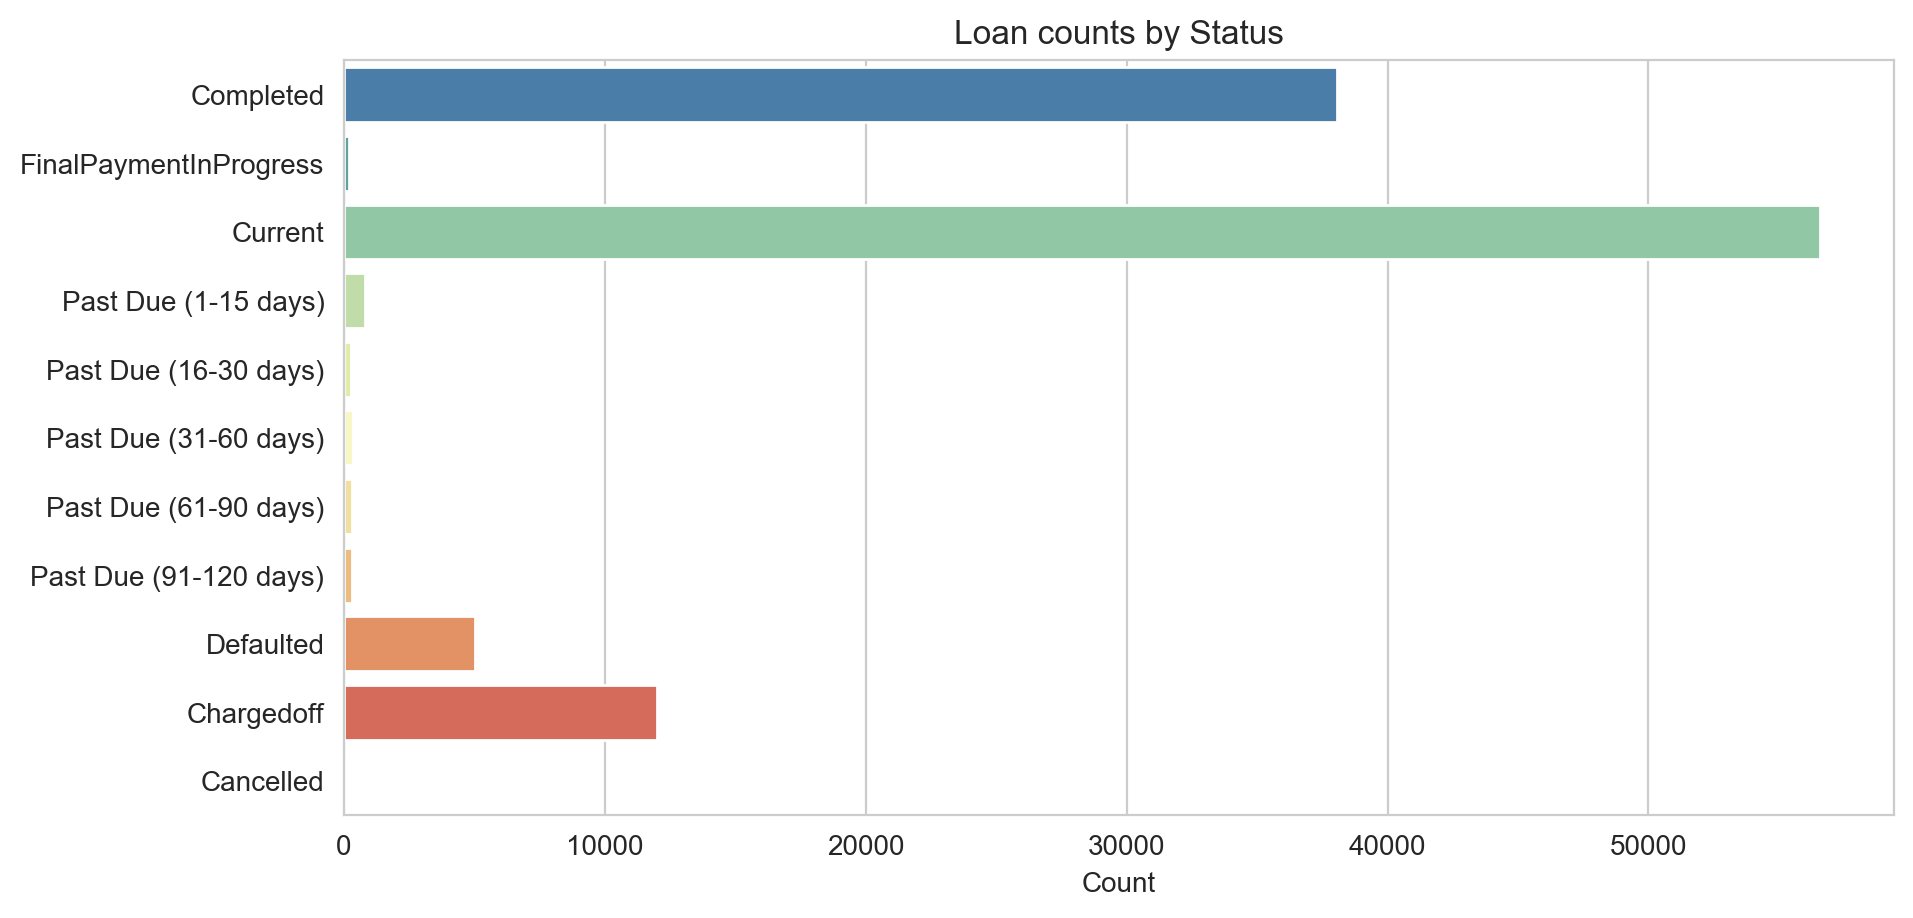

In [20]:
loan_status = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)',
                 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Defaulted','Chargedoff','Cancelled']
loan_statuses = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status)
df['LoanStatus'] = df['LoanStatus'].astype(loan_statuses)

plt.figure(figsize=(10,5))
sns.countplot(data = df, y = 'LoanStatus', palette='Spectral_r')
#plt.xticks(rotation=45)
plt.xlabel('Count')
plt.ylabel('')
plt.title('Loan counts by Status');

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

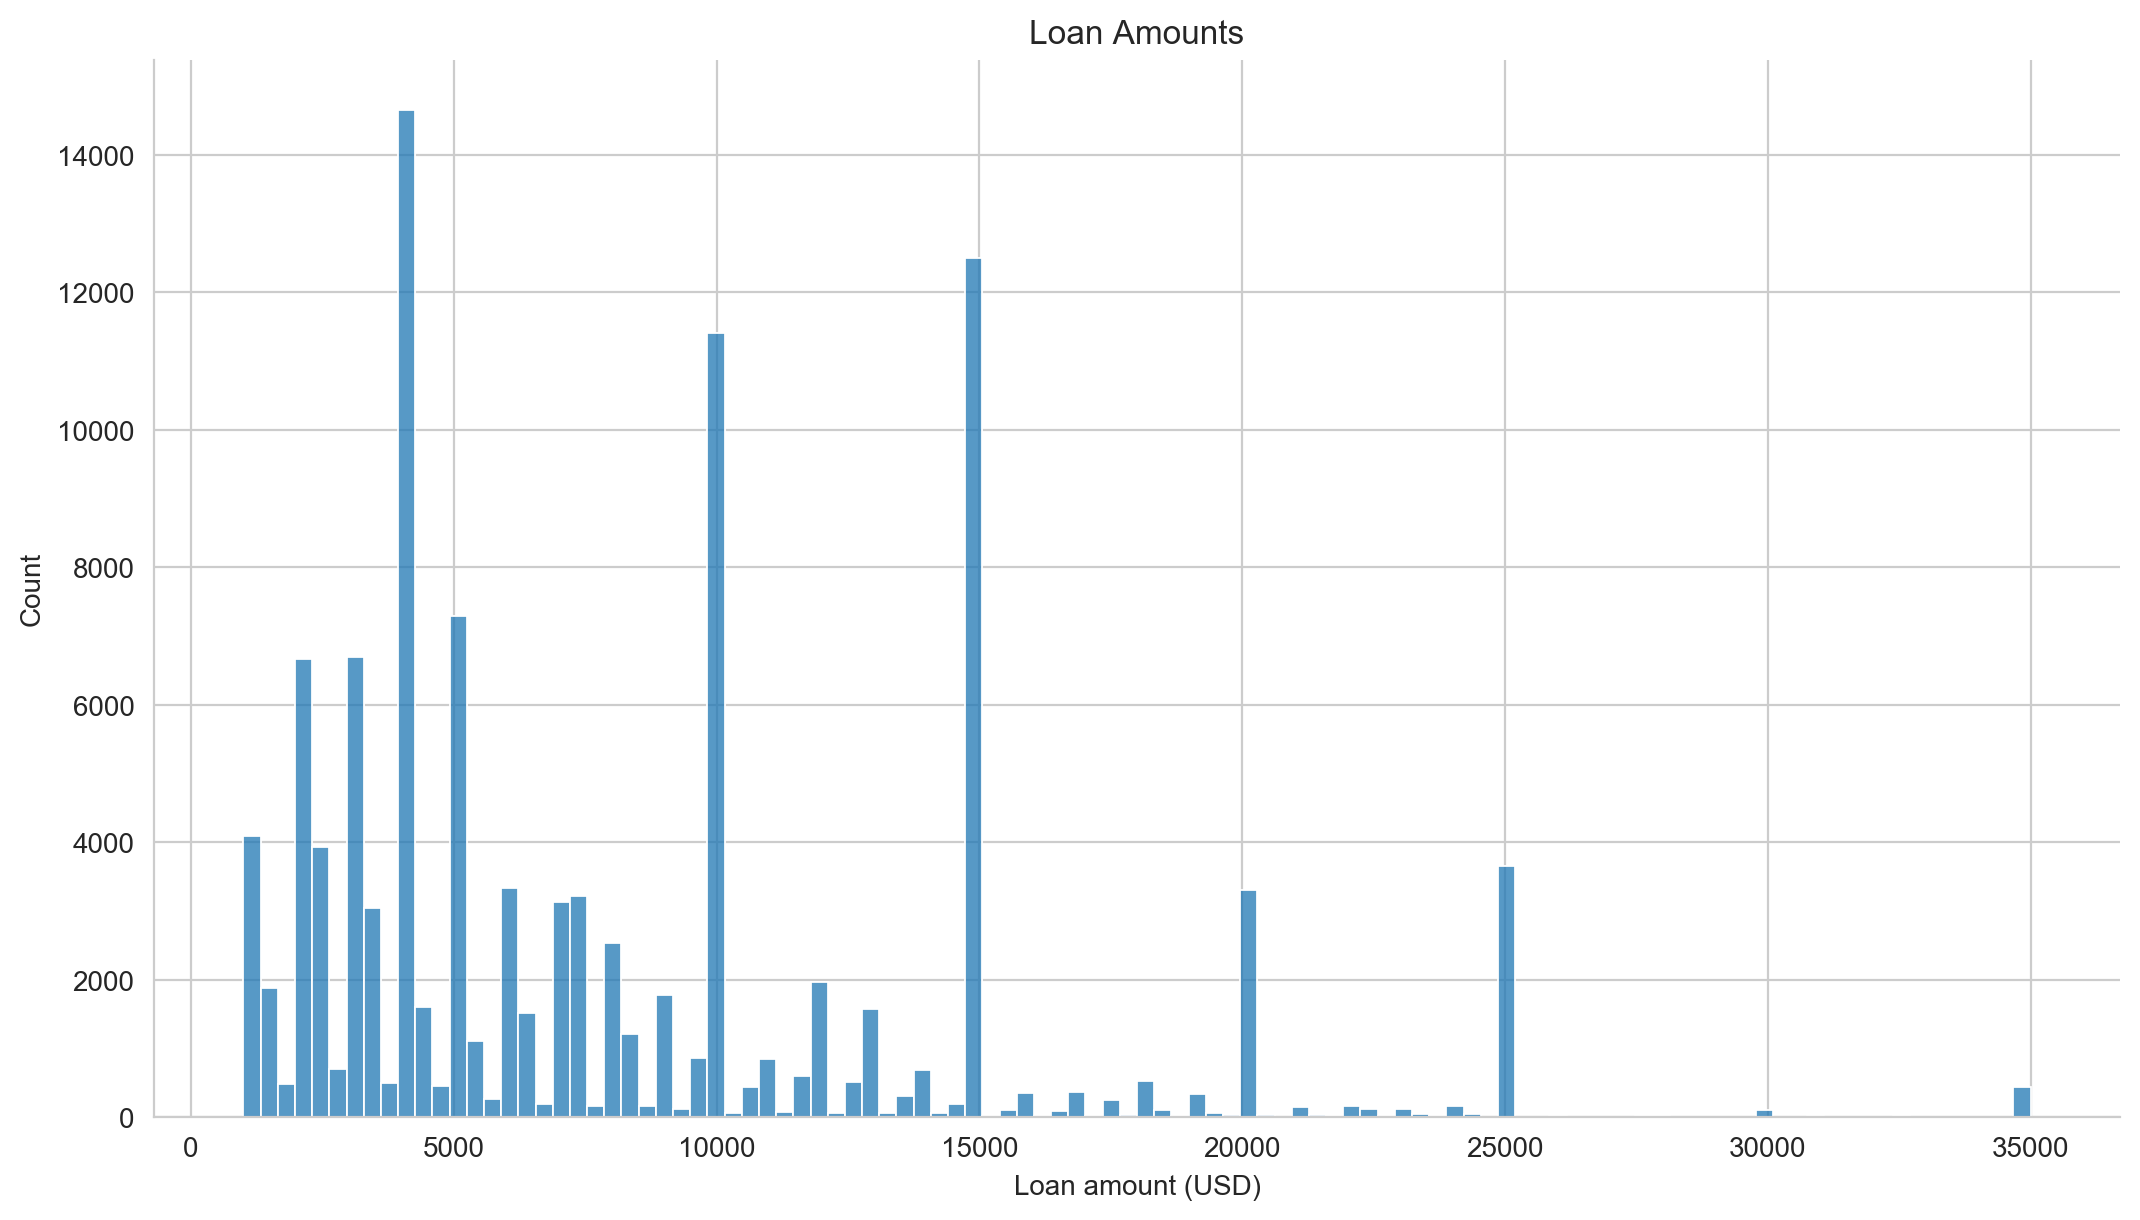

In [26]:
sns.displot(data = df, x = 'LoanOriginalAmount', height =6, aspect = 1.8)
plt.title('Loan Amounts')
plt.xlabel('Loan amount (USD)');

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!